In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
font = {'family':"IPAexGothic",
        'weight' : 'bold'}
mpl.rc('font', **font)

In [5]:
X_train = pd.read_csv("./preprocessed_data/preprocessed_train.csv")
X_test = pd.read_csv("./preprocessed_data/preprocessed_test.csv")
orig_columns = X_train.columns.values

In [6]:
# X_train.iloc[:, -3]

# EDA

In [7]:
print("Training data shape: ", X_train.shape)
X_train.head()

Training data shape:  (31470, 136)


,面積,所在階,建物構造,築年数_月,階建,納戸,間取り_D,間取り_K,間取り_L,間取り_R,...,【デパート】,【レンタルビデオ】,【クリーニング】,【コインパーキング】,【月極駐車場】,緯度,経度,地価5年平均,id,賃料
0,20.01,1,RC(鉄筋コンクリート),117,12,False,False,True,False,False,...,False,False,False,False,False,35.748456,139.728800,483000.0,1,75000
1,16.50,5,鉄骨造,538,10,False,False,False,False,True,...,False,False,False,False,False,35.662885,139.778627,853200.0,2,76000
2,22.05,12,RC(鉄筋コンクリート),102,15,False,False,True,False,False,...,False,False,False,False,False,35.675153,139.666255,730400.0,3,110000
3,60.48,3,RC(鉄筋コンクリート),352,4,False,True,True,True,False,...,False,False,False,False,False,35.700170,139.648465,541600.0,4,150000
4,39.66,1,木造,379,2,False,True,True,False,False,...,False,False,False,False,False,35.766431,139.872321,324000.0,5,74000


In [8]:
print("Testing data shape: ", X_test.shape)
X_test.head()

Testing data shape:  (31262, 135)


,面積,所在階,建物構造,築年数_月,階建,納戸,間取り_D,間取り_K,間取り_L,間取り_R,...,【図書館】,【デパート】,【レンタルビデオ】,【クリーニング】,【コインパーキング】,【月極駐車場】,緯度,経度,地価5年平均,id
0,50.22,8,鉄骨造,588,8,False,True,True,True,False,...,False,False,False,False,False,False,35.617720,139.652763,653600.0,31471
1,20.88,3,RC(鉄筋コンクリート),2,4,False,False,False,False,True,...,False,False,False,False,False,False,35.617761,139.672778,803400.0,31472
2,26.93,1,鉄骨造,280,4,False,False,True,False,False,...,False,False,False,False,False,False,35.742006,139.709040,509200.0,31473
3,23.57,1,木造,434,2,False,False,True,False,False,...,False,False,False,False,False,False,35.675001,139.657326,526000.0,31474
4,50.00,4,RC(鉄筋コンクリート),544,4,False,True,True,True,False,...,False,False,False,False,False,False,35.687855,139.652224,473000.0,31475


# Examine the distribution of the target

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


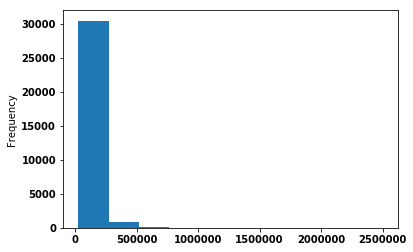

In [9]:
X_train["賃料"].plot.hist();

## Heavily right skewed

# Examine missing values

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values = missing_values_table(X_train)
missing_values

Your selected dataframe has 136 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
アクセス_駅_2_徒歩_分,1979,6.3
アクセス_線_2,1486,4.7
アクセス_駅_2,1486,4.7
アクセス_駅_1_徒歩_分,246,0.8


In [12]:
missing_values = missing_values_table(X_test)
missing_values

Your selected dataframe has 135 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
アクセス_駅_2_徒歩_分,1971,6.3
アクセス_駅_2,1499,4.8
アクセス_線_2,1498,4.8
アクセス_駅_1_徒歩_分,242,0.8


XGBoost can handle missing values

# Column Types

In [13]:
X_train.dtypes.value_counts()

bool       117
int64        7
object       6
float64      6
dtype: int64

In [14]:
X_test.dtypes.value_counts()

bool       117
object       6
float64      6
int64        6
dtype: int64

In [15]:
X_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

建物構造         10
所在地_区        23
アクセス_線_1     64
アクセス_駅_1    462
アクセス_線_2     66
アクセス_駅_2    495
dtype: int64

# Encoding Categorical Variables

In [16]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print('Training Features shape: ', X_train.shape)
print('Testing Features shape: ', X_test.shape)

Training Features shape:  (31470, 1250)
Testing Features shape:  (31262, 1254)


In [17]:
y_train = X_train["賃料"]

X_train, X_test = X_train.align(X_test, join="inner", axis=1)
X_train["賃料"] = y_train

print('Training Features shape: ', X_train.shape)
print('Testing Features shape: ', X_test.shape)

Training Features shape:  (31470, 1230)
Testing Features shape:  (31262, 1229)


# Anomalies

## 面積

In [18]:
X_train.columns[:30]

Index(['面積', '所在階', '築年数_月', '階建', '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R',
       '間取り_S', '間取り_数', '方角_南', '方角_東', '方角_西', '方角_北', '契約期間_月',
       'アクセス_駅_1_徒歩_分', 'アクセス_駅_2_徒歩_分', 'シャワー', 'トイレなし', 'バスなし', 'バス・トイレ別',
       '共同トイレ', '共同バス', '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所'],
      dtype='object')

In [19]:
X_train["面積"].describe()

count    31470.000000
mean        34.808648
std         18.814245
min          4.860000
25%         22.440000
50%         28.410000
75%         42.390000
max        430.100000
Name: 面積, dtype: float64

In [20]:
X_train[X_train["面積"]==430.1]

,面積,所在階,築年数_月,階建,納戸,間取り_D,間取り_K,間取り_L,間取り_R,間取り_S,...,アクセス_駅_2_高輪台駅,アクセス_駅_2_高野駅,アクセス_駅_2_鬼子母神前駅,アクセス_駅_2_鮫洲駅,アクセス_駅_2_鵜の木駅,アクセス_駅_2_鶯谷駅,アクセス_駅_2_鷺ノ宮駅,アクセス_駅_2_麹町駅,アクセス_駅_2_麻布十番駅,賃料
20926,430.1,2,239,10,False,True,True,True,False,False,...,0,0,0,0,0,0,0,0,0,116000


Text(0.5, 0, '面積')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


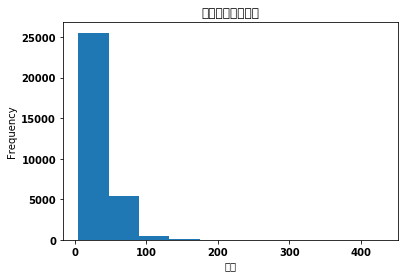

In [21]:
X_train["面積"].plot.hist(title="面積ヒストグラム");
plt.xlabel("面積")

## Probably 43.01 instead of 430.1

In [22]:
X_train["面積"].iloc[20926] = 43.01

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## 所在階

In [23]:
X_train.columns[:30]

Index(['面積', '所在階', '築年数_月', '階建', '納戸', '間取り_D', '間取り_K', '間取り_L', '間取り_R',
       '間取り_S', '間取り_数', '方角_南', '方角_東', '方角_西', '方角_北', '契約期間_月',
       'アクセス_駅_1_徒歩_分', 'アクセス_駅_2_徒歩_分', 'シャワー', 'トイレなし', 'バスなし', 'バス・トイレ別',
       '共同トイレ', '共同バス', '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機', '温水洗浄便座', '脱衣所'],
      dtype='object')

In [24]:
X_train["所在階"].describe()

count    31470.000000
mean         3.880140
std          3.955438
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         53.000000
Name: 所在階, dtype: float64

Text(0.5, 0, '所在階')

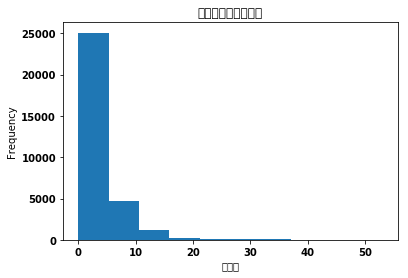

In [25]:
X_train["所在階"].plot.hist(title="所在階ヒストグラム");
plt.xlabel("所在階")

## 築年数_月

In [26]:
orig_columns

array(['面積', '所在階', '建物構造', '築年数_月', '階建', '納戸', '間取り_D', '間取り_K',
       '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南', '方角_東', '方角_西', '方角_北',
       '契約期間_月', '所在地_区', 'アクセス_線_1', 'アクセス_駅_1', 'アクセス_駅_1_徒歩_分',
       'アクセス_線_2', 'アクセス_駅_2', 'アクセス_駅_2_徒歩_分', 'シャワー', 'トイレなし', 'バスなし',
       'バス・トイレ別', '共同トイレ', '共同バス', '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機',
       '温水洗浄便座', '脱衣所', '追焚機能', 'IHコンロ', 'L字キッチン', 'カウンターキッチン', 'ガスコンロ',
       'コンロ1口', 'コンロ2口', 'コンロ3口', 'コンロ4口以上', 'コンロ設置可(コンロ1口)',
       'コンロ設置可(コンロ2口)', 'コンロ設置可(コンロ3口)', 'コンロ設置可(コンロ4口以上)',
       'コンロ設置可(口数不明)', 'システムキッチン', '冷蔵庫あり', '独立キッチン', '給湯', '電気コンロ',
       'BSアンテナ', 'CATV', 'CSアンテナ', 'インターネット使用料無料', 'インターネット対応', '光ファイバー',
       '有線放送', '高速インターネット', '24時間換気システム', '2面採光', '3面採光', 'ウォークインクローゼット',
       'エアコン付', 'エレベーター', 'オール電化', 'ガスその他', 'ガス暖房', 'クッションフロア',
       'シューズボックス', 'タイル張り', 'トランクルーム', 'バリアフリー', 'バルコニー', 'フローリング',
       'プロパンガス', 'ペアガラス', 'ルーフバルコニー', 'ロフト付き', '下水', '二世帯住宅', '二重サッシ',
       '井戸', '公営水道', '冷房', '出窓', 

In [27]:
X_train["築年数_月"].describe()

count    31470.000000
mean       194.336543
std        181.463280
min          0.000000
25%         41.000000
50%        161.000000
75%        329.000000
max      12235.000000
Name: 築年数_月, dtype: float64

Text(0.5, 0, '築年数_月')

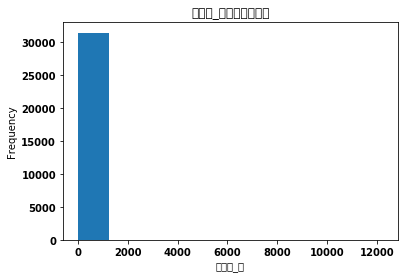

In [28]:
X_train["築年数_月"].plot.hist(title="築年数_月ヒストグラム");
plt.xlabel("築年数_月")

In [29]:
temp_df = X_train[X_train["築年数_月"] > 2000]

Text(0.5, 0, '築年数_月')

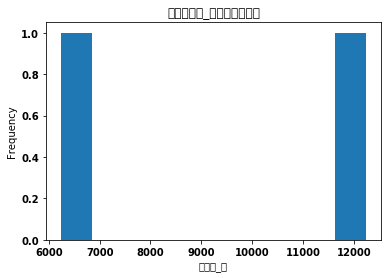

In [30]:
temp_df["築年数_月"].plot.hist(title="高い築年数_月ヒストグラム");
plt.xlabel("築年数_月")

In [31]:
temp_df

,面積,所在階,築年数_月,階建,納戸,間取り_D,間取り_K,間取り_L,間取り_R,間取り_S,...,アクセス_駅_2_高輪台駅,アクセス_駅_2_高野駅,アクセス_駅_2_鬼子母神前駅,アクセス_駅_2_鮫洲駅,アクセス_駅_2_鵜の木駅,アクセス_駅_2_鶯谷駅,アクセス_駅_2_鷺ノ宮駅,アクセス_駅_2_麹町駅,アクセス_駅_2_麻布十番駅,賃料
20231,51.3,3,6245,3,True,True,True,False,False,True,...,0,0,0,0,0,0,0,0,0,112000
20427,24.0,2,12235,2,False,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,82000


In [32]:
train = pd.read_csv("./data/train.csv")

In [33]:
train.iloc[[20231, 20427]]

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
20231,20232,112000,東京都板橋区蓮根３丁目,都営三田線\t西台駅\t徒歩7分\t\t都営三田線\t蓮根駅\t徒歩7分,2DK+S(納戸),520年5ヶ月,南,51.3m2,3階／3階建,専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,コンロ設置可（コンロ3口）／\t給湯,光ファイバー／\tCATV,エアコン付\t出窓／\tバルコニー／\tフローリング／\t室内洗濯機置場／\tタイル張り,NaN,NaN,鉄骨造,NaN
20427,20428,82000,東京都目黒区中町２丁目,東急東横線\t祐天寺駅\t徒歩11分\t\t東急東横線\t中目黒駅\t徒歩15分\t\t東急...,1DK,1019年7ヶ月,南,24m2,2階／2階建,専用トイレ／\tバス・トイレ別／\tシャワー,コンロ設置可（コンロ2口）,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタ...,NaN,NaN,鉄骨造,NaN


In [34]:
temp_month = X_train.query("id!=20232 and 賃料==112000 and 面積>51")["築年数_月"].mean()
print(temp_month)

296.25


In [35]:
X_train["築年数_月"].iloc[20231] = temp_month

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
X_train[X_train["id"]==20232]

,面積,所在階,築年数_月,階建,納戸,間取り_D,間取り_K,間取り_L,間取り_R,間取り_S,...,アクセス_駅_2_高輪台駅,アクセス_駅_2_高野駅,アクセス_駅_2_鬼子母神前駅,アクセス_駅_2_鮫洲駅,アクセス_駅_2_鵜の木駅,アクセス_駅_2_鶯谷駅,アクセス_駅_2_鷺ノ宮駅,アクセス_駅_2_麹町駅,アクセス_駅_2_麻布十番駅,賃料
20231,51.3,3,296.25,3,True,True,True,False,False,True,...,0,0,0,0,0,0,0,0,0,112000


In [37]:
temp_month = X_train.query("id!=20428 and 賃料==82000 and 面積>24")["築年数_月"].mean()
print(temp_month)

213.7748344370861


In [38]:
X_train["築年数_月"].iloc[20427] = temp_month

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
X_train[X_train["id"]==20428]

,面積,所在階,築年数_月,階建,納戸,間取り_D,間取り_K,間取り_L,間取り_R,間取り_S,...,アクセス_駅_2_高輪台駅,アクセス_駅_2_高野駅,アクセス_駅_2_鬼子母神前駅,アクセス_駅_2_鮫洲駅,アクセス_駅_2_鵜の木駅,アクセス_駅_2_鶯谷駅,アクセス_駅_2_鷺ノ宮駅,アクセス_駅_2_麹町駅,アクセス_駅_2_麻布十番駅,賃料
20427,24.0,2,213.774834,2,False,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,82000


Text(0.5, 0, '築年数_月')

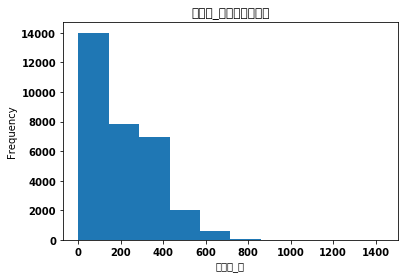

In [40]:
X_train["築年数_月"].plot.hist(title="築年数_月ヒストグラム");
plt.xlabel("築年数_月")

In [41]:
X_train["築年数_月"].describe()

count    31470.000000
mean       193.765524
std        164.798536
min          0.000000
25%         41.000000
50%        161.000000
75%        329.000000
max       1433.000000
Name: 築年数_月, dtype: float64

In [42]:
orig_columns

array(['面積', '所在階', '建物構造', '築年数_月', '階建', '納戸', '間取り_D', '間取り_K',
       '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南', '方角_東', '方角_西', '方角_北',
       '契約期間_月', '所在地_区', 'アクセス_線_1', 'アクセス_駅_1', 'アクセス_駅_1_徒歩_分',
       'アクセス_線_2', 'アクセス_駅_2', 'アクセス_駅_2_徒歩_分', 'シャワー', 'トイレなし', 'バスなし',
       'バス・トイレ別', '共同トイレ', '共同バス', '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機',
       '温水洗浄便座', '脱衣所', '追焚機能', 'IHコンロ', 'L字キッチン', 'カウンターキッチン', 'ガスコンロ',
       'コンロ1口', 'コンロ2口', 'コンロ3口', 'コンロ4口以上', 'コンロ設置可(コンロ1口)',
       'コンロ設置可(コンロ2口)', 'コンロ設置可(コンロ3口)', 'コンロ設置可(コンロ4口以上)',
       'コンロ設置可(口数不明)', 'システムキッチン', '冷蔵庫あり', '独立キッチン', '給湯', '電気コンロ',
       'BSアンテナ', 'CATV', 'CSアンテナ', 'インターネット使用料無料', 'インターネット対応', '光ファイバー',
       '有線放送', '高速インターネット', '24時間換気システム', '2面採光', '3面採光', 'ウォークインクローゼット',
       'エアコン付', 'エレベーター', 'オール電化', 'ガスその他', 'ガス暖房', 'クッションフロア',
       'シューズボックス', 'タイル張り', 'トランクルーム', 'バリアフリー', 'バルコニー', 'フローリング',
       'プロパンガス', 'ペアガラス', 'ルーフバルコニー', 'ロフト付き', '下水', '二世帯住宅', '二重サッシ',
       '井戸', '公営水道', '冷房', '出窓', 

# 階建

In [43]:
X_train["階建"].describe()

count    31470.000000
mean         6.874960
std          6.542603
min          1.000000
25%          3.000000
50%          5.000000
75%         10.000000
max         58.000000
Name: 階建, dtype: float64

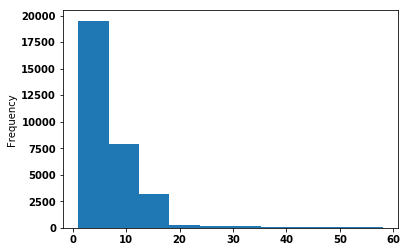

In [44]:
X_train["階建"].plot.hist();

# 所在階_地下

In [45]:
# X_train["所在階_地下"].describe()

In [46]:
# X_train["所在階_地下"].plot.hist();

In [47]:
orig_columns

array(['面積', '所在階', '建物構造', '築年数_月', '階建', '納戸', '間取り_D', '間取り_K',
       '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南', '方角_東', '方角_西', '方角_北',
       '契約期間_月', '所在地_区', 'アクセス_線_1', 'アクセス_駅_1', 'アクセス_駅_1_徒歩_分',
       'アクセス_線_2', 'アクセス_駅_2', 'アクセス_駅_2_徒歩_分', 'シャワー', 'トイレなし', 'バスなし',
       'バス・トイレ別', '共同トイレ', '共同バス', '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機',
       '温水洗浄便座', '脱衣所', '追焚機能', 'IHコンロ', 'L字キッチン', 'カウンターキッチン', 'ガスコンロ',
       'コンロ1口', 'コンロ2口', 'コンロ3口', 'コンロ4口以上', 'コンロ設置可(コンロ1口)',
       'コンロ設置可(コンロ2口)', 'コンロ設置可(コンロ3口)', 'コンロ設置可(コンロ4口以上)',
       'コンロ設置可(口数不明)', 'システムキッチン', '冷蔵庫あり', '独立キッチン', '給湯', '電気コンロ',
       'BSアンテナ', 'CATV', 'CSアンテナ', 'インターネット使用料無料', 'インターネット対応', '光ファイバー',
       '有線放送', '高速インターネット', '24時間換気システム', '2面採光', '3面採光', 'ウォークインクローゼット',
       'エアコン付', 'エレベーター', 'オール電化', 'ガスその他', 'ガス暖房', 'クッションフロア',
       'シューズボックス', 'タイル張り', 'トランクルーム', 'バリアフリー', 'バルコニー', 'フローリング',
       'プロパンガス', 'ペアガラス', 'ルーフバルコニー', 'ロフト付き', '下水', '二世帯住宅', '二重サッシ',
       '井戸', '公営水道', '冷房', '出窓', 

# 階建_地下

In [48]:
# X_train["階建_地下"].describe()

In [49]:
# X_train["階建_地下"].plot.hist();

In [50]:
orig_columns

array(['面積', '所在階', '建物構造', '築年数_月', '階建', '納戸', '間取り_D', '間取り_K',
       '間取り_L', '間取り_R', '間取り_S', '間取り_数', '方角_南', '方角_東', '方角_西', '方角_北',
       '契約期間_月', '所在地_区', 'アクセス_線_1', 'アクセス_駅_1', 'アクセス_駅_1_徒歩_分',
       'アクセス_線_2', 'アクセス_駅_2', 'アクセス_駅_2_徒歩_分', 'シャワー', 'トイレなし', 'バスなし',
       'バス・トイレ別', '共同トイレ', '共同バス', '専用トイレ', '専用バス', '洗面台独立', '浴室乾燥機',
       '温水洗浄便座', '脱衣所', '追焚機能', 'IHコンロ', 'L字キッチン', 'カウンターキッチン', 'ガスコンロ',
       'コンロ1口', 'コンロ2口', 'コンロ3口', 'コンロ4口以上', 'コンロ設置可(コンロ1口)',
       'コンロ設置可(コンロ2口)', 'コンロ設置可(コンロ3口)', 'コンロ設置可(コンロ4口以上)',
       'コンロ設置可(口数不明)', 'システムキッチン', '冷蔵庫あり', '独立キッチン', '給湯', '電気コンロ',
       'BSアンテナ', 'CATV', 'CSアンテナ', 'インターネット使用料無料', 'インターネット対応', '光ファイバー',
       '有線放送', '高速インターネット', '24時間換気システム', '2面採光', '3面採光', 'ウォークインクローゼット',
       'エアコン付', 'エレベーター', 'オール電化', 'ガスその他', 'ガス暖房', 'クッションフロア',
       'シューズボックス', 'タイル張り', 'トランクルーム', 'バリアフリー', 'バルコニー', 'フローリング',
       'プロパンガス', 'ペアガラス', 'ルーフバルコニー', 'ロフト付き', '下水', '二世帯住宅', '二重サッシ',
       '井戸', '公営水道', '冷房', '出窓', 

In [51]:
X_train.select_dtypes(int).head(3)

,所在階,階建,間取り_数,契約期間_月,id,賃料
0,1,12,1,24,1,75000
1,5,10,1,24,2,76000
2,12,15,1,24,3,110000


# 契約期間_月

In [52]:
X_train["契約期間_月"].describe()

count    31470.000000
mean        18.998951
std         11.294541
min          0.000000
25%         24.000000
50%         24.000000
75%         24.000000
max        264.000000
Name: 契約期間_月, dtype: float64

In [53]:
train[X_train["契約期間_月"]==264]

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
1612,1613,77000,東京都荒川区荒川５丁目,京成本線\t新三河島駅\t徒歩3分\t\t日暮里・舎人ライナー\t赤土小学校前駅\t徒歩11...,1K,0年4ヶ月,南東,19.11m2,2階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座,IHコンロ\t／\tコンロ1口／\t給湯,NaN,シューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯機置場／\tタ...,"駐車場\t近隣\t21,600円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 165m\t【スーパー】 570m\t【コンビニ】 166m\t【コンビニ】 ...,木造,22年間
20554,20555,219000,東京都足立区千住寿町,日比谷線\t北千住駅\t徒歩10分\t\t千代田線\t北千住駅\t徒歩10分\t\t京成本線...,3LDK,17年3ヶ月,南,80.28m2,2階／7階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐車場\t空有\t10,800円(税込)\t駐輪場\t無\tバイク置き場\t無",【スーパー】 541m\t【スーパー】 974m\t【コンビニ】 151m\t【コンビニ】 ...,RC（鉄筋コンクリート）,22年間


In [54]:
X_train.select_dtypes(float).head(3)

,面積,築年数_月,アクセス_駅_1_徒歩_分,アクセス_駅_2_徒歩_分,緯度,経度,地価5年平均
0,20.01,117.0,4.0,14.0,35.748456,139.728800,483000.0
1,16.50,538.0,5.0,9.0,35.662885,139.778627,853200.0
2,22.05,102.0,6.0,7.0,35.675153,139.666255,730400.0


In [55]:
inspect_items = X_train.select_dtypes(float).head(3).columns[5:13].values

In [56]:
for item in inspect_items:
    print(X_train[item].describe())
    print()

count    31470.000000
mean       139.730178
std          0.075046
min        139.565946
25%        139.673910
50%        139.723692
75%        139.786197
max        139.915548
Name: 経度, dtype: float64

count    3.147000e+04
mean     6.085206e+05
std      3.227851e+05
min      2.060000e+05
25%      4.060000e+05
50%      5.226000e+05
75%      7.020000e+05
max      2.708000e+06
Name: 地価5年平均, dtype: float64



In [57]:
train[X_train["アクセス_駅_2_徒歩_分"] == 156.0]

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
10876,10877,137000,東京都大田区山王４丁目,京浜東北線\t大森(東京都)駅\t徒歩10分\t\t京王線\t笹塚駅\t徒歩156分\t\t...,1LDK,0年5ヶ月,NaN,37m2,3階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\t給湯,NaN,エアコン付\tシューズボックス／\tロフト付き／\tバルコニー／\tフローリング／\t3面採...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 708m\t【コンビニ】 242m\t【コンビニ】 462m,木造,2年間
20674,20675,125000,東京都大田区山王４丁目,京浜東北線\t大森(東京都)駅\t徒歩10分\t\t京王線\t笹塚駅\t徒歩156分\t\t...,1LDK,0年5ヶ月,NaN,35m2,1階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯機置場\t公営水道／\...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 708m\t【コンビニ】 242m\t【コンビニ】 462m,木造,2年間


# Correlations

In [58]:
# correlations = X_train.corr()["賃料"].sort_values()

In [59]:
# print('Most Positive Correlations:\n', correlations.tail(15))
# print('\nMost Negative Correlations:\n', correlations.head(15))

In [60]:
# X_train["契約期間_定期借家"].unique()

In [61]:
# X_test["契約期間_定期借家"].unique()

In [62]:
# X_train["アクセス_駅_1_車_分"].unique()

In [63]:
# X_test["アクセス_駅_1_車_分"].unique()

In [64]:
X_train["トイレなし"].unique()

array([False])

In [65]:
X_test["トイレなし"].unique()

array([False,  True])

## 面積

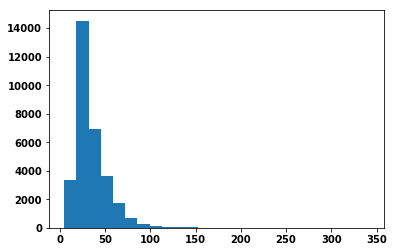

In [66]:
plt.hist(X_train["面積"], bins=25);

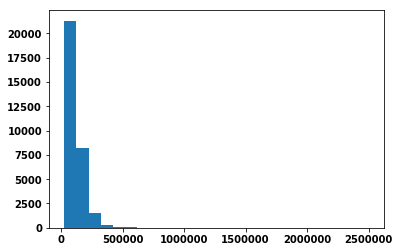

In [67]:
plt.hist(X_train["賃料"], bins=25);

(array([2.600e+01, 4.600e+01, 2.330e+02, 1.005e+03, 2.341e+03, 4.048e+03,
        4.869e+03, 5.421e+03, 4.801e+03, 3.188e+03, 2.221e+03, 1.416e+03,
        9.030e+02, 4.720e+02, 2.220e+02, 1.020e+02, 6.800e+01, 3.100e+01,
        2.500e+01, 1.600e+01, 6.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00]),
 array([10.1266311 , 10.31083791, 10.49504472, 10.67925153, 10.86345833,
        11.04766514, 11.23187195, 11.41607876, 11.60028556, 11.78449237,
        11.96869918, 12.15290599, 12.33711279, 12.5213196 , 12.70552641,
        12.88973322, 13.07394002, 13.25814683, 13.44235364, 13.62656045,
        13.81076725, 13.99497406, 14.17918087, 14.36338767, 14.54759448,
        14.73180129]),
 <a list of 25 Patch objects>)

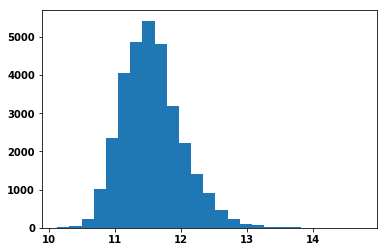

In [68]:
plt.hist(np.log(X_train["賃料"]), bins=25)

# Domain Knowledge Features

In [65]:
# X_train_domain = X_train.copy()
# X_test_domain = X_test.copy()

In [66]:
# X_train["1m^2の賃料"] = X_train["賃料"] / X_train["面積"]

In [67]:
# plt.hist(X_train["1m^2の賃料"], bins=25);

In [68]:
# plt.hist(np.log(X_train["1m^2の賃料"]), bins=25);

In [69]:
# X_train_log = X_train.drop(columns=normal_columns)
# X_test_log = X_test.drop(columns=normal_columns)
# X_train = X_train.drop(columns=log_transform_columns)
# X_test = X_test.drop(columns=log_transform_columns)

In [70]:
print(X_train.columns.values[:200])

['面積' '所在階' '築年数_月' '階建' '納戸' '間取り_D' '間取り_K' '間取り_L' '間取り_R' '間取り_S'
 '間取り_数' '方角_南' '方角_東' '方角_西' '方角_北' '契約期間_月' 'アクセス_駅_1_徒歩_分'
 'アクセス_駅_2_徒歩_分' 'シャワー' 'トイレなし' 'バスなし' 'バス・トイレ別' '共同トイレ' '共同バス' '専用トイレ'
 '専用バス' '洗面台独立' '浴室乾燥機' '温水洗浄便座' '脱衣所' '追焚機能' 'IHコンロ' 'L字キッチン' 'カウンターキッチン'
 'ガスコンロ' 'コンロ1口' 'コンロ2口' 'コンロ3口' 'コンロ4口以上' 'コンロ設置可(コンロ1口)' 'コンロ設置可(コンロ2口)'
 'コンロ設置可(コンロ3口)' 'コンロ設置可(コンロ4口以上)' 'コンロ設置可(口数不明)' 'システムキッチン' '冷蔵庫あり'
 '独立キッチン' '給湯' '電気コンロ' 'BSアンテナ' 'CATV' 'CSアンテナ' 'インターネット使用料無料' 'インターネット対応'
 '光ファイバー' '有線放送' '高速インターネット' '24時間換気システム' '2面採光' '3面採光' 'ウォークインクローゼット'
 'エアコン付' 'エレベーター' 'オール電化' 'ガスその他' 'ガス暖房' 'クッションフロア' 'シューズボックス' 'タイル張り'
 'トランクルーム' 'バリアフリー' 'バルコニー' 'フローリング' 'プロパンガス' 'ペアガラス' 'ルーフバルコニー' 'ロフト付き'
 '下水' '二世帯住宅' '二重サッシ' '井戸' '公営水道' '冷房' '出窓' '地下室' '室内洗濯機置場' '室外洗濯機置場'
 '専用庭' '床下収納' '床暖房' '排水その他' '敷地内ごみ置き場' '水道その他' '汲み取り' '洗濯機置場なし' '浄化槽'
 '石油暖房' '都市ガス' '防音室' '駐輪場' 'バイク置き場' '駐車場_1' '空有' '無' '近隣' '空無' '【スーパー】'
 '【コンビニ】' '【飲食店】' '【ドラッグストア】' '【病院】' '【公園】' '【郵便局】' '【小学校】' '【大学】'
 '【総合病院】

In [71]:
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (31470, 1230)
Testing data shape:  (31262, 1229)


In [72]:
# print('Training data shape: ', X_train_log.shape)
# print('Testing data shape: ', X_test_log.shape)

# Baseline 1

In [73]:
y_train = X_train["賃料"]
X_train = X_train.drop(columns=["賃料", "id"])

In [74]:
X_test = X_test.drop(columns="id")

In [75]:
features = list(X_train.columns)

In [76]:
X_train.shape

(31470, 1228)

In [77]:
X_test.shape

(31262, 1228)

## Imputing and Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

In [79]:
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [80]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (31470, 1228)
Testing data shape:  (31262, 1228)


# Cross validation (XGBoost)

In [82]:
import xgboost as xgb
model = xgb.XGBRegressor(n_jobs=-1,
                         max_depth=10,
                         n_estimators=1700,
                         learning_rate=0.05,
                         random_state=0,
                         gamma=0.3,
                         subsample=0.8,
                        reg_lambda=4,
                        eval_metric="rmse",
                        tree_method="gpu_hist",
                        verbose=-1)

In [83]:
from sklearn.model_selection import cross_val_score

### Scores y_train

In [84]:
# scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=-1)

In [85]:
# scores

In [86]:
# rmse = (scores * (-1))**0.5

In [87]:
# rmse

In [88]:
# rmse.mean()

In [89]:
# rmse.std()

In [90]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

# from tqdm import tqdm
# import pickle

# gbms = []
# for i in range(50):
#     gbm = xgb.XGBRegressor(n_estimators=50,
#                             n_jobs=-1,
#                             num_leaves=int(2**6.18),
#                             feature_fraction=.63,
#                             lambda_l1=10**-2.68,
#                             lambda_l2=10**-2.67,
#                             min_data_in_leaf=3,
#                             learning_rate=10**-1.46,
#                             num_boost_round=1000,
#                             random_state=2434 + i)

#     gbm.fit(X_train, y_train)
#     # test_pred = gbm.predict(test_X) * test_X["capacity"].values
#     # smpsb_df.iloc[:len(test_X), 1] += test_pred / 50
#     gbms.append(gbm)

In [91]:
# with open("models.pickle", mode="rb") as f:
#     gbms = pickle.load(f)

In [92]:
# smpsb_df = pd.read_csv("./input/sample_submit.csv", header=None)
# smpsb_df.iloc[:, 1] = 0

In [93]:
# for i in tqdm(range(50)):
#     gbm = gbms[i]

#     test_pred = gbm.predict(test_X) * test_X["capacity"].values
#     smpsb_df.iloc[:, 1] += test_pred / 50

# HyperOpt

In [94]:
from hyperopt import hp
import numpy as np
from sklearn.metrics import mean_squared_error


# XGB parameters
xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(10, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 2, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.2)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     100
}
xgb_fit_params = {
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10,
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

In [95]:
import xgboost as xgb
# import catboost as ctb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [96]:
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(
#     X_train, y_train, test_size=0.33, random_state=42)

In [97]:
# obj = HPOpt(X_train, X_valid, y_train, y_valid)

# xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=40)

In [99]:
# print(xgb_opt)

# Predict and submit

In [110]:
model = xgb.XGBRegressor(n_jobs=-1,
                         learning_rate=0.1,
                         subsample = 0.8694589424908834,
                         colsample_bytree=1,
                         min_child_weight=1,
                         max_depth=9,
                        tree_method="gpu_hist",
                         n_estimators=100,
                         eval_metric="rmse",
                        verbose=-1)

In [111]:
model.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.5/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8694589424908834,
             tree_method='gpu_hist', verbose=-1, verbosity=1)

In [112]:
y_pred = model.predict(X_test)

In [113]:
smpsb_df = pd.read_csv("./data/sample_submit.csv", header=None)

In [114]:
smpsb_df.shape

(31262, 2)

In [115]:
y_pred.shape

(31262,)

In [116]:
y_pred

array([161269.28 , 119549.945,  76107.62 , ..., 173105.77 , 263951.34 ,
        83717.16 ], dtype=float32)

In [117]:
smpsb_df.head()

,0,1
0,31471,303875
1,31472,422016
2,31473,275390
3,31474,980818
4,31475,436194


In [118]:
smpsb_df[1] = y_pred

In [119]:
smpsb_df.head()

,0,1
0,31471,161269.281250
1,31472,119549.945312
2,31473,76107.617188
3,31474,57438.417969
4,31475,112677.601562


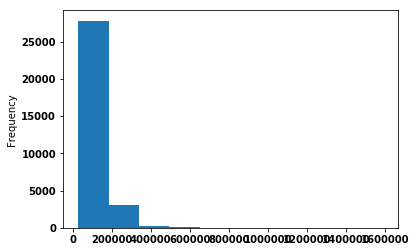

In [121]:
smpsb_df[1].plot.hist()

In [196]:
smpsb_df.to_csv("./submit_files/xgboost7.csv", index=None, header=None)

<Figure size 1440x720 with 0 Axes>

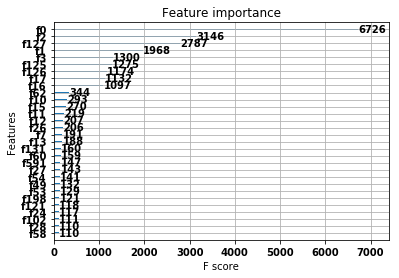

In [203]:
from xgboost import plot_importance
plt.figure(figsize=(20, 10))
plot_importance(model, max_num_features=30)
# plt.savefig("feature_importance_1.png")
plt.show()

In [204]:
feature_importance_values = model.feature_importances_
feature_importances = pd.DataFrame({"feature": features, "importance": feature_importance_values})

In [205]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

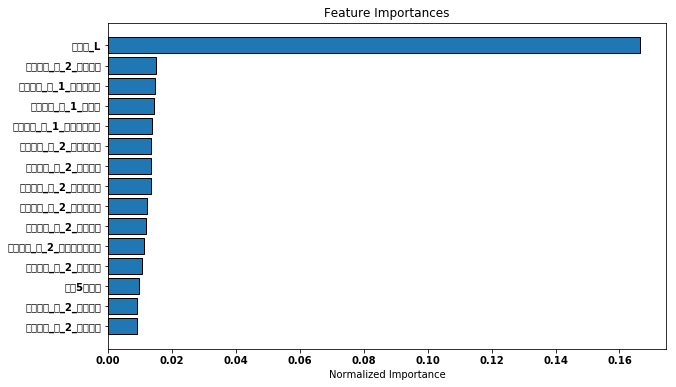

In [206]:
feature_importances_sorted = plot_feature_importances(feature_importances)